## Code and demo

### Import all of them

In [18]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

### Get the content

In [19]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

### Time for Pandas :)

In [20]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [21]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

### Waste of space

In [22]:
df.drop(['dateChecked'],axis=1,inplace=True)

### I like strings


In [23]:
df['state']=df['state'].apply(str)

### Check, check

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20164 entries, 0 to 20163
Data columns (total 55 columns):
date                           20164 non-null datetime64[ns]
state                          20164 non-null object
positive                       19968 non-null float64
probableCases                  8822 non-null float64
negative                       15683 non-null float64
pending                        2084 non-null float64
totalTestResultsSource         20164 non-null object
totalTestResults               20062 non-null float64
hospitalizedCurrently          16755 non-null float64
hospitalizedCumulative         12473 non-null float64
inIcuCurrently                 11072 non-null float64
inIcuCumulative                3660 non-null float64
onVentilatorCurrently          8770 non-null float64
onVentilatorCumulative         1249 non-null float64
recovered                      11628 non-null float64
lastUpdateEt                   19559 non-null object
dateModified                

### Show up

In [25]:
df.head(10)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-02-24,AK,55736.0,NaN,NaN,NaN,totalTestsViral,1662156.0,46.0,1260.0,...,NaN,0,0,67b3b6ca1627ea40d08871803b2659b08b55daae,0,0,0,0,0,NaN
1,2021-02-24,AL,490220.0,106338.0,1885151.0,NaN,totalTestsPeopleViral,2269033.0,773.0,45250.0,...,NaN,84,0,676bdea053983e254017ca1a5c4545ebe6b40100,0,0,0,0,0,NaN
2,2021-02-24,AR,317396.0,66671.0,2367951.0,NaN,totalTestsViral,2618676.0,545.0,14649.0,...,NaN,10,32,2db69acfbfe82aa932fd048848b370f4d670e601,0,0,0,0,0,NaN
3,2021-02-24,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f43db694c3c66828b057fcd5303d23ff2014fad3,0,0,0,0,0,NaN
4,2021-02-24,AZ,811968.0,54615.0,2960197.0,NaN,totalTestsViral,7512395.0,1449.0,57156.0,...,NaN,43,84,66eb7b9f8629ac10b33a2ddb54fadd311466dd44,0,0,0,0,0,NaN
5,2021-02-24,CA,3455361.0,NaN,NaN,NaN,totalTestsViral,47652172.0,6764.0,NaN,...,NaN,314,0,73cbf2d1ea6a9377fc80bad073db69cfc87adb38,0,0,0,0,0,NaN
6,2021-02-24,CO,423558.0,23002.0,2149917.0,NaN,totalTestEncountersViral,6080273.0,427.0,23349.0,...,NaN,10,56,fed32c2407fd9bb049293894590d501160cdf06c,0,0,0,0,0,NaN
7,2021-02-24,CT,278184.0,18584.0,NaN,NaN,totalTestsViral,6227431.0,495.0,12257.0,...,NaN,23,0,4f5151c89fba8c04fff802fafb839ed51d90fde1,0,0,0,0,0,NaN
8,2021-02-24,DC,39943.0,NaN,NaN,NaN,totalTestEncountersViral,1204605.0,211.0,NaN,...,NaN,3,0,ffa9847c58964ef84776090f728ca4890320369b,0,0,0,0,0,NaN
9,2021-02-24,DE,85506.0,4515.0,533904.0,NaN,totalTestEncountersViral,1368734.0,182.0,NaN,...,NaN,23,0,fc43ea23c4303a5eaaedc86de2f02d3ed7defd03,0,0,0,0,0,NaN


### Replacing the `NaN` by -1

In [28]:
df.fillna(value=-1, inplace=True)

In [31]:
df.head(9)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-02-24,AK,55736.0,-1.0,-1.0,-1.0,totalTestsViral,1662156.0,46.0,1260.0,...,-1.0,0,0,67b3b6ca1627ea40d08871803b2659b08b55daae,0,0,0,0,0,-1.0
1,2021-02-24,AL,490220.0,106338.0,1885151.0,-1.0,totalTestsPeopleViral,2269033.0,773.0,45250.0,...,-1.0,84,0,676bdea053983e254017ca1a5c4545ebe6b40100,0,0,0,0,0,-1.0
2,2021-02-24,AR,317396.0,66671.0,2367951.0,-1.0,totalTestsViral,2618676.0,545.0,14649.0,...,-1.0,10,32,2db69acfbfe82aa932fd048848b370f4d670e601,0,0,0,0,0,-1.0
3,2021-02-24,AS,0.0,-1.0,2140.0,-1.0,totalTestsViral,2140.0,-1.0,-1.0,...,-1.0,0,0,f43db694c3c66828b057fcd5303d23ff2014fad3,0,0,0,0,0,-1.0
4,2021-02-24,AZ,811968.0,54615.0,2960197.0,-1.0,totalTestsViral,7512395.0,1449.0,57156.0,...,-1.0,43,84,66eb7b9f8629ac10b33a2ddb54fadd311466dd44,0,0,0,0,0,-1.0
5,2021-02-24,CA,3455361.0,-1.0,-1.0,-1.0,totalTestsViral,47652172.0,6764.0,-1.0,...,-1.0,314,0,73cbf2d1ea6a9377fc80bad073db69cfc87adb38,0,0,0,0,0,-1.0
6,2021-02-24,CO,423558.0,23002.0,2149917.0,-1.0,totalTestEncountersViral,6080273.0,427.0,23349.0,...,-1.0,10,56,fed32c2407fd9bb049293894590d501160cdf06c,0,0,0,0,0,-1.0
7,2021-02-24,CT,278184.0,18584.0,-1.0,-1.0,totalTestsViral,6227431.0,495.0,12257.0,...,-1.0,23,0,4f5151c89fba8c04fff802fafb839ed51d90fde1,0,0,0,0,0,-1.0
8,2021-02-24,DC,39943.0,-1.0,-1.0,-1.0,totalTestEncountersViral,1204605.0,211.0,-1.0,...,-1.0,3,0,ffa9847c58964ef84776090f728ca4890320369b,0,0,0,0,0,-1.0


### Now let's see some plots

In [11]:
def plot_var(var='positiveIncrease',
             state='AR'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(10,4))
    plt.title("Positive Cases of Arizona",fontsize=17)
    plt.bar(x=x,height=y,edgecolor='red',color='black')
    plt.grid(True)
   
    plt.show()

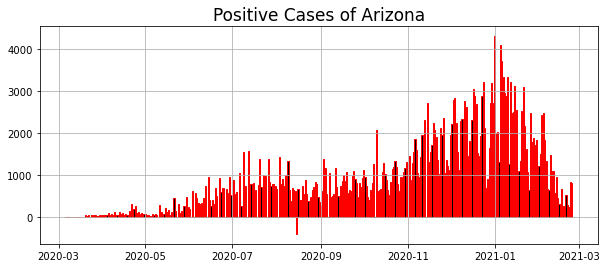

In [12]:
plot_var()

In [32]:
def plot_var(var='probableCases',
             state='AR'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(8,6))
    plt.title("Rise in Probable Cases",fontsize=17)
    plt.bar(x=x,height=y,edgecolor='green',color='red')
    plt.grid(True)
   
    plt.show()

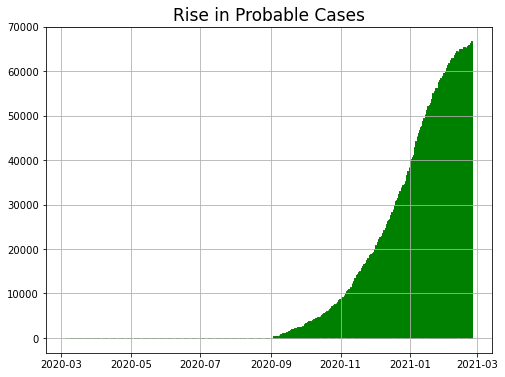

In [33]:
plot_var()

In [16]:
def plot_var(var='deathIncrease',
             state='AR'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(13,4))
    plt.title("Death Cases",fontsize=17)
    plt.bar(x=x,height=y,edgecolor='black',color='red')
    plt.grid(True)
   
    plt.show()

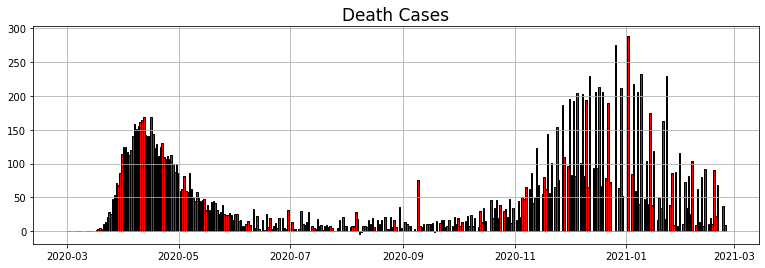

In [17]:
plot_var('deathIncrease','MI')